# MLZC_HOMEWORK_WK2

## SETUP

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import sys

print("✅ Libraries loaded\n")
print(f"Python version: {sys.version.split()[0]}")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version:  {np.__version__}")
print(f"Seaborn version:  {sns.__version__}")
print(f"Matplotlib version:  {matplotlib.__version__}")

✅ Libraries loaded

Python version: 3.12.3
Pandas version: 2.3.2
NumPy version:  2.3.2
Seaborn version:  0.13.2
Matplotlib version:  3.10.6


## DATA

In [3]:
import urllib.request

url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'
filename = 'car_fuel_efficiency.csv'

urllib.request.urlretrieve(url, filename)
print(f"✅ Downloaded: {filename}")

✅ Downloaded: car_fuel_efficiency.csv


In [175]:
df = pd.read_csv('car_fuel_efficiency.csv')

print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nMissing values:\n{df.isnull().sum()}")

df.head()

Shape: 9704 rows × 11 columns

Columns: ['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight', 'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain', 'num_doors', 'fuel_efficiency_mpg']

Data types:
engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

Missing values:
engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64


,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [176]:
df_copy = df
df_copy

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


## EDA

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

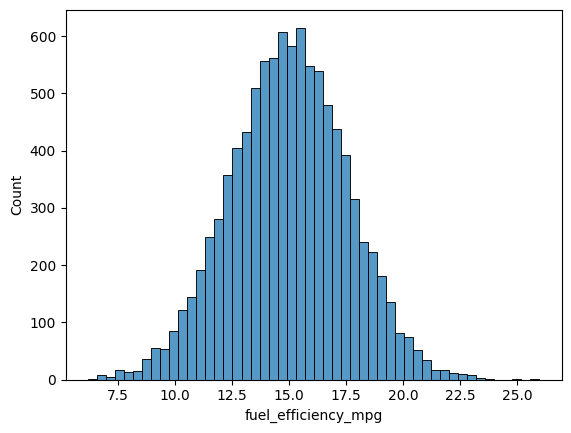

In [62]:
sns.histplot(df_copy.fuel_efficiency_mpg, bins=50)

## FRAMEWORK

In [151]:
n = len(df_copy)

# create split values
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

# create index
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

# split data
df_train = df_copy.iloc[idx[:n_train]]
df_val = df_copy.iloc[idx[n_train:n_train+n_val]]
df_test = df_copy.iloc[idx[n_train+n_val:]]

# drop indexes
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# create target datasets
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

# delete target varaibles from training datasets
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

## TRAINING

In [65]:
xi = [240, 159, 2916, 2001]
w0 = 7.17
w = [0.01, 0.2, 0.04, 0.5]
w_new = [w0] + w


In [66]:
def dot(xi, w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]
        
    return res

In [71]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [75]:
x1 = [1, 240, 159, 2916, 2001]
x2 = [1, 300, 650, 2000, 2006]
x3 = [1, 500, 400, 1500, 2010]

X = [x1, x2, x3]
X = np.array(X)
X

array([[   1,  240,  159, 2916, 2001],
       [   1,  300,  650, 2000, 2006],
       [   1,  500,  400, 1500, 2010]])

In [77]:
def linear_regression(X):
    return X.dot(w_new)

In [7]:
X = np.array([
    [240, 159, 2916, 2001],
    [200, 650, 2000, 2010],
    [500, 400, 1500, 2003],
    [300, 349, 2916, 2002],
    [211, 200, 2412, 2006],
    [432, 499, 1376, 2015],
    [400, 159, 2916, 2009],
    [375, 650, 2786, 2006],
    [200, 399, 2000, 2001],
    [500, 400, 1500, 2012],
])

In [137]:
y = np.array([13, 13, 14, 16, 12, 17, 13, 12, 16, 12])

In [8]:
def train_linear_regression(X, y):
    ones = np.ones((X.shape[0], 1))
    X = np.hstack([ones, X])
    
    # normal equation
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T.dot(y))
    
    # return bias term and weights
    return w_full[0], w_full[1:]

In [139]:
w0, w = train_linear_regression(X, y)
w0, w

(np.float64(174.61422158920024),
 array([-0.00175401,  0.00020841, -0.00118722, -0.07857247]))

## MODEL

In [102]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

In [103]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

## RMSE

In [104]:
def rmse(y, y_pred):
    error = (y - y_pred) ** 2
    mse = error.mean()
    
    return  np.sqrt(mse)    

In [138]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

round(rmse(y_val, y_pred), 2)

np.float64(0.52)

<Axes: ylabel='Count'>

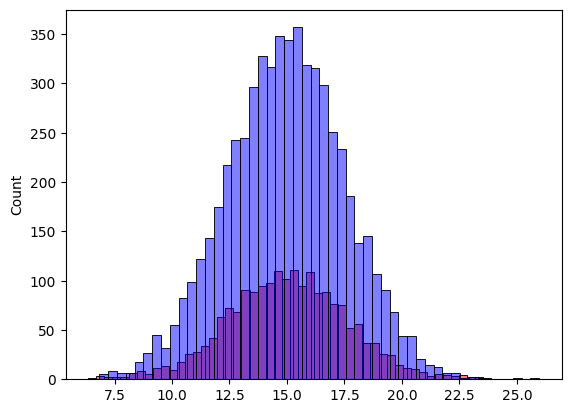

In [106]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [50]:
rmse(y_train, y_pred)

np.float64(0.5202614265099076)

## FEATURE ENGINEERING

In [152]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight']

In [153]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2023 - df.model_year
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [139]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

round(rmse(y_val, y_pred), 2)

np.float64(0.52)

In [154]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones((X.shape[0], 1))
    X = np.hstack([ones, X])
    
    # normal equation
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    # return bias term and weights
    return w_full[0], w_full[1:]

In [155]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

round(rmse(y_val, y_pred), 2)

np.float64(0.52)

## QUESTIONS

In [ ]:
# Q1: What column has missing values?
df_copy.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [47]:
# Q2: What's the median (50% percentile) for variable 'horsepower'?
df_copy.horsepower.median()

np.float64(149.0)

In [ ]:
# Q3: Do zeros or mean in HP missing values give better RMSE?
zero_rmse = rmse(y_train, y_pred)
print(f'RMSE with zero values in HP: {round(zero_rmse, 2)}')

RMSE with zero values in HP: 0.52


In [44]:
mean_rmse = rmse(y_train, y_pred)
print(f'RMSE with mean values in HP: {round(mean_rmse, 2)}')

RMSE with mean values in HP: 0.46


In [157]:
# Q4: Which r gives the best RMSE?
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    
    print(f'r={r}: RMSE = {round(rmse(y_val, y_pred), 2)}')

r=0: RMSE = 0.52
r=0.01: RMSE = 0.52
r=0.1: RMSE = 0.52
r=1: RMSE = 0.52
r=5: RMSE = 0.55
r=10: RMSE = 0.64
r=100: RMSE = 2.06


In [177]:
# Q5: STD of different seed values
def create_framework(df, seed):
    n = len(df)

    # create split values
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    # create index
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    # split data
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    # drop indexes
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    # create target datasets
    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values

    # delete target varaibles from training datasets
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']
    
    return df_train, df_val, df_test, y_train, y_val, y_test


In [178]:
def train_linear_regression(X, y):
    ones = np.ones((X.shape[0], 1))
    X = np.hstack([ones, X])
    
    # normal equation
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T.dot(y))
    
    # return bias term and weights
    return w_full[0], w_full[1:]

In [179]:
def prepare_X(df):
    df = df.copy()
    
    base = ['engine_displacement', 'horsepower', 'vehicle_weight']
    
    df['age'] = 2023 - df.model_year
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [184]:
# Collect RMSE scores
rmse_scores = []

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    # Create splits with each seed
    df_train, df_val, df_test, y_train, y_val, y_test = create_framework(df_copy, seed)
    
    # Train model
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train)
    
    # Evaluate on validation
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    
    score = rmse(y_val, y_pred)
    rmse_scores.append(score)
    print(f'seed={seed}: RMSE = {round(score, 2)}')

# Calculate standard deviation
std = np.std(rmse_scores)
print(f'\nStandard deviation: {round(std, 3)}')

seed=0: RMSE = 0.52
seed=1: RMSE = 0.52
seed=2: RMSE = 0.52
seed=3: RMSE = 0.52
seed=4: RMSE = 0.51
seed=5: RMSE = 0.53
seed=6: RMSE = 0.53
seed=7: RMSE = 0.51
seed=8: RMSE = 0.51
seed=9: RMSE = 0.51

Standard deviation: 0.007


In [199]:
# Q6: RMSE on test dataset
r = 0.001
seed = 9

df_train, df_val, df_test, y_train, y_val, y_test = create_framework(df_copy, seed)

df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

y_full_train = np.concatenate([y_train, y_val])

X_full_train = prepare_X(df_full_train)
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r)

X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)

print(f'seed={seed} - r={r} - RMSE = {round(rmse(y_test, y_pred), 2)}')


seed=9 - r=0.001 - RMSE = 0.52
